In [ ]:
import math
import random
import matplotlib.pyplot as plt

El arreglo de los embalses mensuales de un año:  [182255000, 182255000, 442809256.57608235, 484942160.65888715, 562105152.3388598, 427259824.5221652, 397745757.00438535, 525349577.68564755, 577776820.5084887, 591407287.2664118, 566337131.4287343, 453325617.6675352, 403303091.3232409]
El volumen de ocupación promedio es de : 445913205.92157215
El costo total es de : 11706000.0
La Trayectoria está representada en la siguiente gráfica:


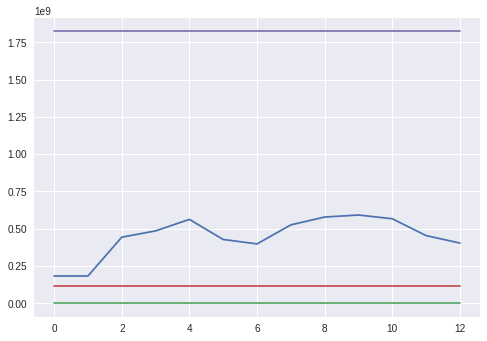

In [ ]:
#Discretización de la presa. División entre niveles de consumo. Función de embalse (Lluvia y Caudal)


NAME = 1822550000 #máximo metros cúbicos
NAMO = 950300000
NAMINO = 114500000 #Minimo de operacion en metros cubicos
Rio_max = 195500000 #máximo metros cúbicos al mes
Rio_min = 81250000 #mínimo metros cúbicos al mes
Ct_Desborde = 5000000 #Costos inventados
Ct_Sequia = 10000000
Ct_Compuerta = 20000
Nv_Lluvia = [35.0, 17.9, 17.8, 1.9, 3.9, 25.5, 184.4, 198.2, 86.3, 53.1, 26.3, 37.0]
Nv_Lluvia1 = [0, 0, 0, 0, 0, 0, 0, 184.4, 198.2, 86.3, 53.1, 26.3, 37.0]
Lluvia_anual = 687.3
Consumo_max = 260496000
Cuenca = 10762000000 #Superficie que recibe escurrimiento en metros cuadrados

def Embalse(): #Utilizamos la función presentada en la anterior tarea 
  #El embalse en un tiempo t, será igual al embalse del estado anterior más el agregado por cauce y lluvia, menos el consumo y lo vertido en precaucion de desborde
    Et = [182255000]
    Yiv = [0]
    Riv = [0]
    Cns = [0]
    Vrt = [0]
    
    Nv_Lluvia = [0, 35.0, 17.9, 17.8, 1.9, 3.9, 25.5, 184.4, 198.2, 86.3, 53.1, 26.3, 37.0]
    for i in range(1,13):
      n = random.uniform(10760000, 10762000)
      rivi = random.uniform(Rio_min, Rio_max)
      Con = random.uniform(60, 70) + 30.500
      Consumo = ((((Con*60)*60)*24)*30)
      
      Yiv.append(Nv_Lluvia[i]*n)
      Riv.append(rivi)
      Cns.append(Consumo)
      Vrt.append(Nv_Lluvia1[i]*10000000)
      Et.append(Et[i-1]+Yiv[i-1]+Riv[i-1]-Cns[i-1]-Vrt[i-1])        
    return Et
EMB = Embalse()
print("El arreglo de los embalses mensuales de un año: ", EMB)

def Consumo_t(): #Array de consumos de aproximaciones a los datos reales(metros cúbicos utilizados para riego y generación eléctrica)
    Cns = []
    for i in range(11):
        Con = random.uniform(60, 70) + 30.500
        Consumo = ((((Con*60)*60)*24)*30)
        Cns.append(Consumo)
    return Cns

def Niveles(): #Un array que indique la capacidad hasta el nivel i de la presa. Siendo el nivel máximo 7, muy cercano al NAME
    Niv = []
    for i in range(8):
        nivi = (260364285.714*i)
        Niv.append(nivi)
    return Niv
   

def Rio(): #Un array que indica un caudal aproximado que llega a la presa cada mes
    Riv = []
    for i in range(11):
        rivi = random.uniform(Rio_min, Rio_max)
        Riv.append(rivi)
    return Riv

  
def Lluvia(): #Arreglo de volumen aproximado de Lluvia en i mes, utilizando aproximaciones aleatorias a la cuenca de la presa y promedios de volumen de litros por metro cuadrado.
    Yiv = []
    Nv_Lluvia = [35.0, 17.9, 17.8, 1.9, 3.9, 25.5, 184.4, 198.2, 86.3, 53.1, 26.3, 37.0]
    for i in range(11):
      n = random.uniform(10760000000, 10762000000)
      Yiv.append(Nv_Lluvia[i]*n)
    return Yiv   
    

#Volumen de ocupación promedio
def Promedio():
  tot = 0
  for i in range(len(EMB)):
    tot = tot + EMB[i]
    
  p = tot/len(EMB)
  return p

print("El volumen de ocupación promedio es de :", Promedio())

#Costo 

def Costo():
  ct = 0
  for i in range(len(Nv_Lluvia1)):
    ct = ct + (Nv_Lluvia1[i]*Ct_Compuerta)
    
  return ct

print("El costo total es de :", Costo())
print("La Trayectoria está representada en la siguiente gráfica:")
  





plt.plot(range(13), EMB)
plt.plot(range(13), [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
plt.plot(range(13), [NAMINO, NAMINO, NAMINO, NAMINO, NAMINO, NAMINO, NAMINO, NAMINO, NAMINO, NAMINO, NAMINO, NAMINO, NAMINO])
plt.plot(range(13), [NAME, NAME, NAME, NAME, NAME, NAME, NAME, NAME, NAME, NAME, NAME, NAME, NAME])
plt.show()

